In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [45]:
import pandas as pd
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")

Fencing.head()

C:\Users\sonam\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\sonam\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\sonam\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ID,time,RR,VO2,power
0,1,-130.840,672,0.302008,0
1,1,-130.168,672,0.302008,0
2,1,-129.536,632,0.301336,0
3,1,-128.824,712,0.301336,0
4,1,-127.948,876,0.301336,0


Q1: Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [18]:
df=pd.concat([Kayaking,Triathlon,Fencing])
df


,ID,time,RR,VO2,power
0,11,-168.600,727.0,0.287147,0
1,11,-167.872,728.0,0.287147,0
2,11,-167.148,724.0,0.287147,0
3,11,-166.484,664.0,0.320580,0
4,11,-165.836,648.0,0.320580,0
...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0
27599,10,943.124,424.0,0.786363,0
27600,10,943.552,428.0,0.786363,0
27601,10,943.976,424.0,0.786363,0


In [47]:
df1=pd.DataFrame(Athletes)
df1

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson
5,6,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez
6,7,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons
7,8,15,51.2,165,80,133,fencing,Female,White,Aiden,Bennett
8,9,14,57.1,176,50,125,fencing,Female,African,Chloe,Price
9,10,14,58.8,177,101,162,fencing,Female,African,Lily,Jordan


2.Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [20]:
df.loc[df['time'] < 0,'ExType']='Warm Up' 
df.loc[(df['time'] >= 0) & (df['power'] > 0), 'ExType'] = 'GET'
df.loc[(df['time'] >= 0) & (df['power'] == 0), 'ExType'] = 'Cool Down'
df

,ID,time,RR,VO2,power,ExType
0,11,-168.600,727.0,0.287147,0,Warm Up
1,11,-167.872,728.0,0.287147,0,Warm Up
2,11,-167.148,724.0,0.287147,0,Warm Up
3,11,-166.484,664.0,0.320580,0,Warm Up
4,11,-165.836,648.0,0.320580,0,Warm Up
...,...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0,Cool Down
27599,10,943.124,424.0,0.786363,0,Cool Down
27600,10,943.552,428.0,0.786363,0,Cool Down
27601,10,943.976,424.0,0.786363,0,Cool Down


In [ ]:
15.Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
   Zone 1 (recovery/easy) <100 HR max
   Zone 2 (aerobic/base) 100-120 HR max 
   Zone 3 (tempo) 120-135 HR max 
   Zone 4 (lactate threshold) 135-155 HR max 
   Zone 5 (anaerobic) 155+ HR max and above

In [22]:
df['HR']=60/(df['RR']/1000)
df
df.loc[df['HR'] < 100,'Zone Type']='Zone 1'
df.loc[(df['HR'].between(100,120)), 'Zone Type'] = 'Zone 2'
df.loc[(df['HR'].between(121,135)), 'Zone Type'] = 'Zone 3'
df.loc[(df['HR'].between(136,155)), 'Zone Type'] = 'Zone 4'
df.loc[df['HR'] > 155, 'Zone Type'] = 'Zone 5'
df

,ID,time,RR,VO2,power,ExType,HR,Zone Type
0,11,-168.600,727.0,0.287147,0,Warm Up,82.530949,Zone 1
1,11,-167.872,728.0,0.287147,0,Warm Up,82.417582,Zone 1
2,11,-167.148,724.0,0.287147,0,Warm Up,82.872928,Zone 1
3,11,-166.484,664.0,0.320580,0,Warm Up,90.361446,Zone 1
4,11,-165.836,648.0,0.320580,0,Warm Up,92.592593,Zone 1
...,...,...,...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0,Cool Down,140.186916,Zone 4
27599,10,943.124,424.0,0.786363,0,Cool Down,141.509434,Zone 4
27600,10,943.552,428.0,0.786363,0,Cool Down,140.186916,Zone 4
27601,10,943.976,424.0,0.786363,0,Cool Down,141.509434,Zone 4


Q65:   [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  Use array slicing to display elements 4,7,10,17.

Q66: On average, how long did each participant spend at 200 watts?

In [27]:
filtered_df = df[df['power'] == 200]
avg_time =filtered_df.groupby("ID")["time"].mean().round(1)
avg_time

ID
3     750.4
4     747.4
5     752.2
6     747.6
9     689.2
10    736.2
11    755.5
12    748.7
13    747.9
14    760.2
15    749.1
16    758.2
18    734.5
Name: time, dtype: float64

Q67: Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

In [41]:
kv=Kayaking["VO2"].mean()
tv=Triathlon["VO2"].mean()
fv=Fencing["VO2"].mean()
a= [kv,tv,fv]
print(a)
b=pd.DataFrame(a).max().round(1)
print("Kayaking had the highest average cardiorespiratory fitness in terms of v02 max:",b)

[1.8338044528651811, 1.2383460431459545, 1.385422203718255]
Kayaking had the highest average cardiorespiratory fitness in terms of v02 max: 0    1.8
dtype: float64


Q68: What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)

In [86]:
#During a workout session 220 - age is used as a benchmark for heart rate zones
df2 = pd.merge(df, df1, on='ID')
df2.loc[(df2['age'] == 12) & (df2['HR'] > 0.9*(220-12))]
df2.loc[(df2['age'] == 13) & (df2['HR'] > 0.9*(220-13))]
df2.loc[(df2['age'] == 14) & (df2['HR'] > 0.9*(220-14))]
df2.loc[(df2['age'] == 15) & (df2['HR'] > 0.9*(220-15))]
df2.loc[(df2['age'] == 16) & (df2['HR'] > 0.9*(220-16))]
df2.loc[(df2['age'] == 17) & (df2['HR'] > 0.9*(220-17))]
df2.loc[(df2['age'] == 18) & (df2['HR'] > 0.9*(220-18))]
df2[['ID','HR', 'age']]
print(df2.groupby('age')['ID'].count())
    

age
12     4981
13     5499
14     5458
15     8731
16     9977
17     6277
18    11139
Name: ID, dtype: int64


In [88]:
df2 = pd.merge(df, df1, on='ID')
df2.loc[(df2['age'] == 12) & (df2['HR'] == (220-12))]
df2.loc[(df2['age'] == 13) & (df2['HR'] == (220-13))]
df2.loc[(df2['age'] == 14) & (df2['HR'] ==(220-14))]
df2.loc[(df2['age'] == 15) & (df2['HR'] ==(220-15))]
df2.loc[(df2['age'] == 16) & (df2['HR'] ==(220-16))]
df2.loc[(df2['age'] == 17) & (df2['HR'] ==(220-17))]
df2.loc[(df2['age'] == 18) & (df2['HR'] ==(220-18))]
df2[['ID','HR', 'age']]
print(df2.groupby('age')['ID'].count())

age
12     4981
13     5499
14     5458
15     8731
16     9977
17     6277
18    11139
Name: ID, dtype: int64


Q69: What was the lowest heart rate recorded at a power wattage of 200

In [100]:
HR = (60/(filtered_df['RR']/1000)).min()
print("the lowest heart rate recorded at a power wattage of 200: ",HR)

the lowest heart rate recorded at a power wattage of 200:  71.77033492822967


Q70: On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

Q71: Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

Q72: Provide an example of a lambda function that multiplies any 2 input values.

In [106]:
v1 =int(input("Please enter your first number: "))
v2=int(input("Please enter your second number: "))
v={'First_number':v1,'Second_number': v2}

d=pd.DataFrame(v, index=[0])

s= d.apply(lambda x,y: x*y)
s


Please enter your first number:  7
Please enter your second number:  8


TypeError: <lambda>() missing 1 required positional argument: 'y'

Q73: How long was athlete 17s warm up

Q74: Take a students full name and reverse it using a for loop

In [ ]:
a=pd.DataFrame(Athletes)


Q75: What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR

Q76: np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.

Q77: Display a violin chart to show distribution of VO2Max against age.

Q78: Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.

Q79: Plot the Donut chart athlete distrubution by Gender

C:\Users\sonam\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


TypeError: object of type 'numpy.float32' has no len()

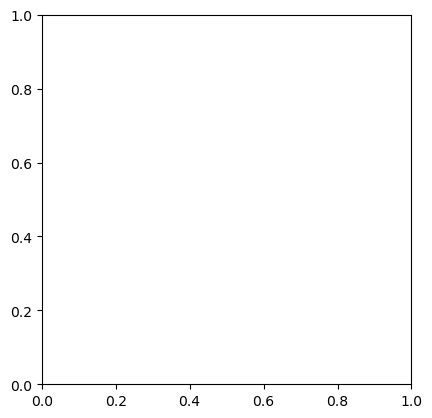

In [533]:
a=pd.DataFrame(Athletes)
#compute data for plotting
label = a['Gender']
values = df['ID'].count()

# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
 
# Pie Chart
plt.pie(values, colors=colors, labels=label,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Athlete distribution by Gender')
 
# Displaying Chart
plt.show()


Q80: Find the size of Tuple for any given input

In [124]:
values =input("Please insert new item: ")
new_values =values.split(",")
a_tuple= tuple(new_values)
print(a_tuple)
print("size of tuple is ", len(a_tuple))

Please insert new item:  5,7,3


('5', '7', '3')
size of tuple is  3
